In [ ]:
# import necessary libraries
import numpy as np
import pandas as pd
# to upload and read data in google colab
import re
import io
from google.colab import files
from google.colab import drive
# for graph
import seaborn as sns
import matplotlib.pyplot as plt
# ML preparation
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from keras.preprocessing.text import Tokenizer
from keras.utils import pad_sequences
# for ML
from sklearn.pipeline import Pipeline
from sklearn.naive_bayes import MultinomialNB
import xgboost as xgb
#evaluation
from sklearn import metrics
from sklearn.metrics import mean_squared_error as MSE
from sklearn.metrics import confusion_matrix

In [ ]:
uploaded = files.upload()

Saving Preprocessed_data.csv to Preprocessed_data.csv


In [ ]:
df = pd.read_csv(io.BytesIO(uploaded['Preprocessed_data.csv']))
df.head()

Unnamed: 0                                            Answer   Manual1   \
0           0  Komputer adalah serangkaian ataupun sekelompok...        60   
1           2  mesin yang membantu manusia untuk menjalankan ...        30   
2           3  Komputer adalah alat komputasi yang diciptakan...        12   
3           5  Komputer adalah alat yang dipakai untuk mengol...        20   
4           6  komputer merupakan alat untuk mengolah data. m...        40   

   Manual2  Manual3  Topic  Normalised  \
0       95       75      3    0.857495   
1       20       25      3    0.437903   
2       10       10      3    0.253458   
3       30       25      3    0.437903   
4       40       50      3    0.612290   

                                         CleanAnswer  \
0  komputer adalah serangkaian ataupun sekelompok...   
1  mesin yang membantu manusia untuk menjalankan ...   
2  komputer adalah alat komputasi yang diciptakan...   
3  komputer adalah alat yang dipakai untuk mengol...   
4  komputer merupakan alat untuk mengolah data me...   

                                                Stem  \
0  komputer adalah rangkai atau kelompok mesin el...   
1  mesin yang bantu manusia untuk jalan segara kerja   
2  komputer adalah alat komputasi yang cipta untu...   
3  komputer adalah alat yang pakai untuk olah dat...   
4  komputer rupa alat untuk olah data laku hitung...   

                                              Tokens  char_count  word_count  \
0  ['komputer', 'rangkai', 'kelompok', 'mesin', '...         359          47   
1  ['mesin', 'bantu', 'manusia', 'jalan', 'segara...          62           8   
2  ['komputer', 'alat', 'komputasi', 'cipta', 'hi...          87          12   
3  ['komputer', 'alat', 'pakai', 'olah', 'data', ...         486          63   
4  ['komputer', 'rupa', 'alat', 'olah', 'data', '...         137          17   

   avg_word_len  spell_err_count  
0      7.638298                0  
1      7.750000                0  
2      7.250000                1  
3      7.714286                2  
4      8.058824                1

In [ ]:
df.describe()

Unnamed: 0     Manual1       Manual2      Manual3        Topic  \
count  1780.000000  1780.000000  1780.000000  1780.000000  1780.000000   
mean   1069.300562    41.752247    45.084831    45.466292     1.458427   
std     619.269325    24.441091    28.311566    26.640793     1.103911   
min       0.000000     0.000000     0.000000     0.000000     0.000000   
25%     548.750000    23.000000    25.000000    25.000000     0.000000   
50%    1049.000000    38.000000    40.000000    50.000000     1.000000   
75%    1598.250000    55.000000    65.000000    50.000000     2.000000   
max    2161.000000   100.000000   100.000000   100.000000     3.000000   

        Normalised   char_count   word_count  avg_word_len  spell_err_count  
count  1780.000000  1780.000000  1780.000000   1780.000000      1780.000000  
mean      0.586395   199.014045    27.449438      7.291289         4.165730  
std       0.225437   263.799169    36.667309      0.877851         6.061337  
min       0.000000    27.000000     5.000000      4.555556         0.000000  
25%       0.430574    82.000000    11.000000      6.750000         1.000000  
50%       0.598110   127.000000    18.000000      7.250000         2.000000  
75%       0.718265   213.000000    29.000000      7.750000         6.000000  
max       1.000000  4061.000000   543.000000     15.625000        90.000000

In [ ]:
# change score to 11 classes
df['Target'] = df['Normalised']*10
df['Target'] = df['Target'].round()
df['Target'] = df['Target'].astype(int)

df['Target']

0       9
1       4
2       3
3       4
4       6
       ..
1775    4
1776    4
1777    6
1778    2
1779    4
Name: Target, Length: 1780, dtype: int64

In [ ]:
text = df['Stem']
label = df['Target']

# Calculating the total vocabulary
tk = Tokenizer()
tk.fit_on_texts(text)

vocab = len(tk.word_index)+1
vocab

3902

In [ ]:
# Maximum length
max_len = np.max(df['Stem'].apply(lambda x: len(x.split())).values)
max_len

543

In [ ]:
def embedding(text):
    return tk.texts_to_sequences(text)

train_padded = pad_sequences(embedding(text), 543, padding='post')
train_padded

array([[  44,    3,  261, ...,    0,    0,    0],
       [ 407,    1,   96, ...,    0,    0,    0],
       [  44,    3,  102, ...,    0,    0,    0],
       ...,
       [  31, 3900,  461, ...,    0,    0,    0],
       [  78,   60, 2073, ...,    0,    0,    0],
       [ 476,  461,  166, ...,    0,    0,    0]], dtype=int32)

In [ ]:
categories=['0', '1', '2', '3', '4', '5', '6', '7', '8', '9', '10']
def seaborn_conf(y, ypred):
    y_true = ['0', '1', '2', '3', '4', '5', '6', '7', '8', '9', '10']
    y_pred = ['0', '1', '2', '3', '4', '5', '6', '7', '8', '9', '10']
    # make sure both arrays are of the same type
    y_true = np.array(y_true).astype(int)
    y_pred = np.array(y_pred).astype(int)
    cf = confusion_matrix(y, ypred)
    df_cm = pd.DataFrame(cf, columns=np.unique(y_true), index = np.unique(y_true))
    plt.figure(figsize=(8,6))
    sns.heatmap(df_cm, annot=True, fmt='g')
    plt.title('Confusion matrix')
    plt.xlabel('Predicted value')
    plt.ylabel('Real value')
    plt.show()

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(train_padded, label, test_size=0.2)

In [ ]:
#start ML
#naive bayes
nb = MultinomialNB()

# Train the model - CountVectorizer model
nb.fit(x_train, y_train)

MultinomialNB()

In [ ]:
# Class and probability predictions
yp_class = nb.predict(x_test)
yp_prob = nb.predict_proba(x_test)[:, 1]

In [ ]:
print(metrics.accuracy_score(y_test, yp_class))
seaborn_conf(y_test, yp_class)

0.12640449438202248


In [ ]:
# xgb
n_est = np.arange(10, 100, 10)
test_XG = []
for nest in n_est:
    xgb_classifier = xgb.XGBClassifier(n_estimators = nest,
                                       learning_rate=0.15,
                                       max_depth=4,
                                       use_label_encoder=False,
                                       eval_metric='auc')
    xgb_classifier.fit(x_train, y_train)
    yp = xgb_classifier.score(x_test, y_test)
    test_XG.append(yp)

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarnin

In [ ]:
fig = plt.figure(figsize=(10, 7))
plt.plot(n_est, test_XG, c='purple')
plt.xlabel('N Estimators')
plt.xticks(n_est)
plt.ylabel('AUC')
plt.legend(prop={'size': 12}, loc=3)
plt.title('AUC vs. N Estimators', size=14)
plt.show()

In [ ]:
xgb_classifier = xgb.XGBClassifier(n_estimators = 80,
                                       learning_rate=0.15,
                                       max_depth=4,
                                       use_label_encoder=False)
xgb_classifier.fit(x_train, y_train)
yp = xgb_classifier.predict(x_test)

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


0.37640449438202245


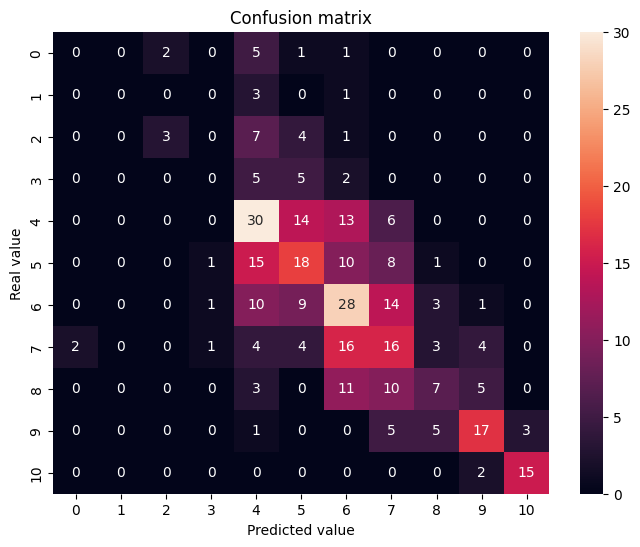

In [ ]:
print(metrics.accuracy_score(y_test, yp))
seaborn_conf(y_test, yp)